In [ ]:
from math import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import itertools

In [ ]:
data = []
names = ['/content/1.txt','/content/2.txt']
for elem in names:
    with open(elem) as f:
        float_data = list(map(float, f.readlines()))
        data.append(float_data)

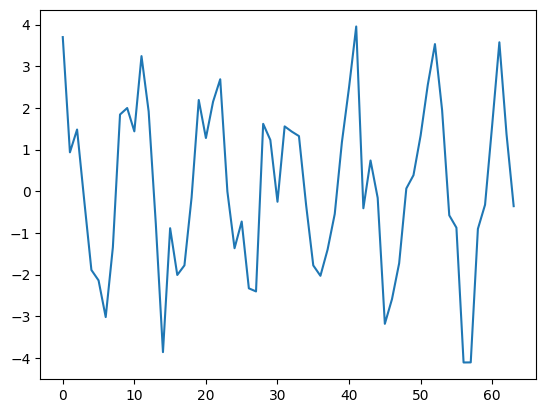

In [ ]:
plt.plot(data[0])

1. Простое скользящее среднее (SMA).

In [ ]:
def sma(x1):
    w = [3, 5, 7, 9]
    wis = []
    for ww in w:
        wis.append([1/(2*ww+1) for i in range(-ww, ww+1)])

    sma = [[], [], [], []]

    for i in range(len(w)):
        xi = x1
        xi = [x1[0]]*(w[i]) + xi + [x1[-1]]*(w[i])
        for j in range(w[i], len(xi)-w[i]):
            sma[i].append(round(sum(wis[i][k]*xi[j+k] for k in range(-w[i], w[i]+1)), 3))
    return sma

In [ ]:
print(sma(data[0]))

[[2.426, 1.627, 0.793, -0.167, -0.888, -0.758, -0.684, -0.447, 0.286, 0.866, 1.185, 0.826, 0.436, -0.137, -0.596, -1.08, -1.041, -0.747, 0.112, 0.623, 0.909, 0.968, 0.885, 0.239, -0.287, -0.363, -0.571, -0.606, -0.188, 0.12, 0.642, 0.938, 0.453, -0.013, -0.177, -0.477, -0.514, -0.346, 0.266, 0.462, 0.858, 1.035, 0.658, 0.12, -0.483, -1.039, -0.926, -0.84, -0.452, 0.507, 1.155, 1.319, 1.185, 0.543, -0.235, -0.729, -1.28, -1.331, -0.737, -0.416, 0.12, 0.655, 0.733, 0.728], [1.85, 1.239, 0.78, 0.611, 0.456, 0.251, 0.209, 0.298, 0.093, -0.238, -0.147, -0.135, -0.022, 0.087, 0.118, 0.053, 0.118, 0.067, -0.108, -0.161, 0.124, -0.007, -0.043, 0.266, 0.391, 0.169, 0.194, 0.129, 0.005, -0.024, -0.062, -0.18, -0.096, 0.073, 0.033, 0.148, 0.531, 0.352, 0.289, 0.154, -0.105, -0.178, -0.151, -0.018, 0.067, 0.082, 0.087, 0.048, 0.262, 0.143, 0.078, -0.007, -0.145, -0.07, -0.105, 0.005, 0.208, 0.101, -0.253, -0.463, -0.443, -0.396, -0.055, 0.286], [1.558, 1.434, 1.321, 1.17, 1.14, 1.021, 0.722, 0.218

2. Взвешенное скользящее среднее (WMA).

In [ ]:
def wma(x1):
    w = [3, 5, 7, 9]
    wiw = []
    for ww in w:
        wiw.append([exp(-0.3*abs(i))/sum(exp(-0.3*abs(j)) for j in range(-ww, ww+1)) for i in range(-ww, ww+1)])

    wma = [[], [], [], []]

    for i in range(len(w)):
        xi = x1
        xi = [x1[0]]*(w[i]) + xi + [x1[-1]]*(w[i])
        for j in range(w[i], len(xi)-w[i]):
            wma[i].append(round(sum(wiw[i][k]*xi[j+k] for k in range(-w[i], w[i]+1)), 3))
    return wma

In [ ]:
print(wma(data[0]))

[[2.086, 1.231, 0.475, -0.429, -0.937, -0.337, -0.156, -0.097, 0.537, 0.839, 0.87, 0.22, 0.041, -0.339, -0.5, -0.8, -0.632, -0.472, 0.398, 0.761, 0.722, 0.588, 0.578, -0.093, -0.462, -0.071, -0.204, -0.409, -0.022, 0.126, 0.623, 0.872, 0.155, -0.398, -0.352, -0.404, -0.171, 0.102, 0.733, 0.426, 0.628, 0.688, 0.178, -0.202, -0.56, -0.887, -0.548, -0.448, -0.16, 0.79, 1.233, 1.056, 0.741, -0.105, -0.74, -0.709, -0.946, -0.773, -0.084, -0.207, -0.093, 0.314, 0.414, 0.621], [1.15, 0.575, 0.428, 0.841, 1.079, 0.984, 0.999, 0.929, 0.133, -0.918, -0.9, -0.94, -0.581, 0.032, 0.577, 0.7, 0.923, 0.758, 0.044, -0.531, -0.324, -0.721, -0.761, 0.129, 0.668, 0.48, 0.724, 0.658, 0.289, -0.085, -0.431, -0.789, -0.63, -0.124, 0.128, 0.562, 1.347, 0.836, 0.551, 0.034, -0.776, -1.023, -0.838, -0.269, 0.243, 0.643, 0.905, 0.817, 0.851, 0.165, -0.388, -0.934, -1.216, -0.725, -0.324, 0.374, 1.158, 1.073, 0.29, -0.374, -0.69, -0.95, -0.582, 0.004], [0.767, 1.218, 1.564, 1.695, 2.044, 1.998, 1.394, 0.263, -0.

3. Экспоненциальное сглаживание (EMA).

In [ ]:
def ema(x1):
    ema = [[] for i in range(9)]
    alpha = [round(0.1 * i, 1) for i in range(1, 10)]

    for i in range(len(alpha)):
        ema[i].append(x1[0])
        for j in range(1, len(x1)):
            ema[i].append(round(alpha[i]*x1[j] + (1-alpha[i])*x1[j-1], 3))
    return ema

In [ ]:
print(ema(data[0]))

[[3.698530065829765, 3.422, 0.987, 1.31, -0.391, -1.916, -2.229, -2.854, -1.028, 1.856, 1.94, 1.616, 3.109, 1.644, -1.092, -3.566, -1.001, -1.988, -1.617, 0.086, 2.097, 1.363, 2.202, 2.417, -0.144, -1.305, -0.888, -2.339, -2.004, 1.578, 1.081, -0.073, 1.543, 1.419, 1.157, -0.478, -1.807, -1.968, -1.316, -0.374, 1.308, 2.642, 3.517, -0.295, 0.647, -0.464, -3.124, -2.504, -1.55, 0.096, 0.479, 1.459, 2.65, 3.372, 1.693, -0.609, -1.2, -4.111, -3.789, -0.847, -0.134, 1.792, 3.354, 1.197], [3.698530065829765, 3.145, 1.042, 1.139, -0.558, -1.941, -2.317, -2.687, -0.709, 1.871, 1.884, 1.797, 2.976, 1.374, -1.4, -3.268, -1.113, -1.965, -1.454, 0.319, 2.006, 1.45, 2.256, 2.148, -0.28, -1.241, -1.049, -2.346, -1.602, 1.539, 0.933, 0.108, 1.53, 1.408, 0.991, -0.623, -1.832, -1.905, -1.231, -0.202, 1.44, 2.787, 3.081, -0.181, 0.557, -0.766, -3.065, -2.418, -1.371, 0.128, 0.574, 1.58, 2.748, 3.213, 1.44, -0.639, -1.523, -4.111, -3.469, -0.789, 0.058, 1.99, 3.133, 1.024], [3.698530065829765, 2.869, 1

In [ ]:
def exponential_moving_average(data, alpha):
    return data.ewm(alpha=alpha, adjust=False).mean()

4. Двойное экспоненциальное сглаживание (DEMA).

In [ ]:
def dema(x1):
    dema = [[[] for i in range(9)] for j in range(9)]
    alpha = [round(0.1 * i, 1) for i in range(1, 10)]
    gamma = [round(0.1 * i, 1) for i in range(1, 10)]

    for i in range(9):
        for j in range(9):
            b = []
            dema[i][j].append(x1[0])
            b.append(round(x1[1] - x1[0], 3))
            for k in range(1, len(x1)):
                dema[i][j].append(round(alpha[i]*x1[k-1] + (1 - alpha[i]) * (dema[i][j][k-1] + b[k-1])))
                b.append(round(gamma[j] * (dema[i][j][k] - dema[i][j][k-1]) + (1 - gamma[j]) * b[k-1], 3))
    return dema

In [ ]:
print(dema(data[0]))

[[[3.698530065829765, 1, -1, -3, -5, -7, -9, -11, -12, -13, -13, -13, -13, -13, -13, -13, -13, -13, -13, -12, -11, -10, -9, -8, -7, -6, -5, -5, -5, -4, -3, -2, -1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0], [3.698530065829765, 1, -1, -3, -5, -7, -9, -10, -11, -11, -11, -11, -10, -9, -8, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3.698530065829765, 1, -1, -3, -5, -7, -8, -9, -10, -10, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], [3.698530065829765, 1, -1, -3, -5, -7, -8, -9, -9, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 5, 5, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -6, -6, -6, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 6, 5, 4, 3, 2, 1, 0], [3.6985300

5. После подбора оптимальных параметров провести тест Дарбина Уотсона (𝑚 = 1, 𝛼 = 0.95) на данных после исключения выделенного тренда для каждого метода и каждого ряда.

In [ ]:
def luing_box_test(r, x):
    x1 = [x1 - r1 for x1, r1 in zip(x, r)]
    s = 0
    for k in range(1, 6):
        rk = (
            (
                (len(x1) - k) * sum(x1[i] * x1[i + k] for i in range(len(x1) - k))
                - sum(x1[i] for i in range(len(x1) - k))
                * sum(x1[i + k] for i in range(len(x1) - k))
            )
            / (
                (len(x1) - k) * sum(x1[i] ** 2 for i in range(len(x1) - k))
                - (sum(x1[i] for i in range(0, len(x1) - k))) ** 2
            )
            ** 0.5
            * (
                (len(x1) - k) * sum(x1[i + k] ** 2 for i in range(len(x1) - k))
                - (sum(x1[i + k] for i in range(len(x1) - k))) ** 2
            )
            ** 0.5
        )
        s += rk**2/(len(x1)-k)

    Q = len(x1) * (len(x1) + 2) * s

    return (scipy.stats.chi2.ppf(1-0.05, 5) < Q)

In [ ]:
def durbin_watson_test(r, x):
    e = [x1 - r1 for x1, r1 in zip(x, r)]
    d = sum((e[i] - e[i - 1])**2 for i in range(1, len(e)))/sum(e[i]**2 for i in range(len(e)))
    return 0 <= d < 1.57

6. В отчете изобразить графики исходных данных, графики трендов при оптимальных параметрах у каждого метода для каждого ряда, расчетные формулы, а также результаты тестов Дарбина-Уотсона.

In [ ]:
for i in range(3, -1, -1):
    if luing_box_test(sma(data[0])[i], data[0]):
        print(f'Есть ли наличие автокорреляции до {2*i+3}-ого порядка в SMA: {luing_box_test(sma(data[0])[i], data[0])}')
        break

for i in range(3, -1, -1):
    if luing_box_test(wma(data[0])[i], data[0]):
        print(f'Есть ли наличие автокорреляции до {2*i+3}-ого порядка в WMA: {luing_box_test(wma(data[0])[i], data[0])}')
        break

for i in range(8, -1, -1):
    if luing_box_test(ema(data[0])[i], data[0]):
        print(f'Есть ли наличие автокорреляции до {i+1}-ого порядка в EMA: {luing_box_test(ema(data[0])[i], data[0])}')
        break

a = False
for i in range(8, -1, -1):
    if a:
        break
    for j in range(8, -1, -1):
        a = luing_box_test(dema(data[0])[i][j], data[0])
        if a:
            print(f'Есть ли наличие автокорреляции до {i+1, j+1}-ого порядка в DEMA: {luing_box_test(dema(data[0])[i][j], data[0])}')
            break

Есть ли наличие автокорреляции до 9-ого порядка в SMA: True
Есть ли наличие автокорреляции до 9-ого порядка в WMA: True
Есть ли наличие автокорреляции до 9-ого порядка в EMA: True
Есть ли наличие автокорреляции до (9, 9)-ого порядка в DEMA: True


In [ ]:
print(f'Есть ли положительная автокорреляция до {4}-ого порядка в SMA: {durbin_watson_test(sma(data[0])[3], data[0])}')

print(f'Есть ли положительная автокорреляция до {4}-ого порядка в WMA: {durbin_watson_test(wma(data[0])[3], data[0])}')

print(f'Есть ли положительная автокорреляция до {9}-ого порядка в EMA: {durbin_watson_test(ema(data[0])[8], data[0])}')

print(f'Есть ли положительная автокорреляция {9, 9}-ого порядка в DEMA: {durbin_watson_test(dema(data[0])[8][8], data[0])}')

Есть ли положительная автокорреляция до 4-ого порядка в SMA: True
Есть ли положительная автокорреляция до 4-ого порядка в WMA: True
Есть ли положительная автокорреляция до 9-ого порядка в EMA: False
Есть ли положительная автокорреляция (9, 9)-ого порядка в DEMA: False


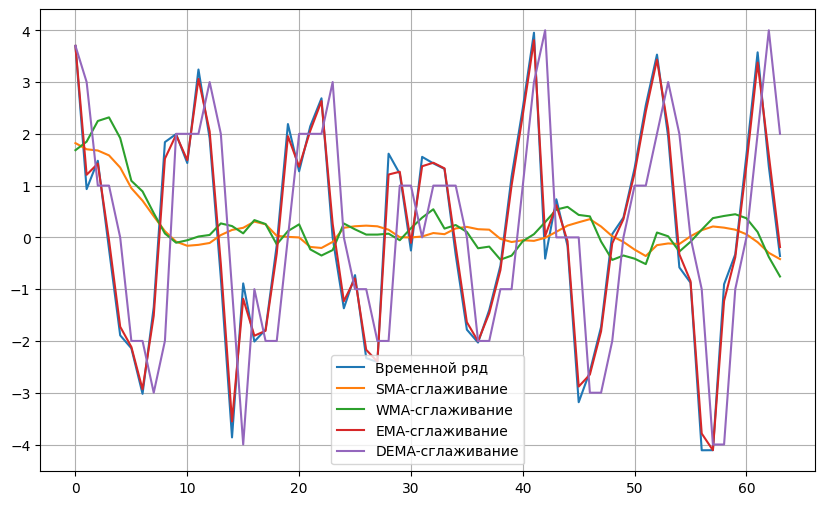

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data[0])
plt.plot(sma(data[0])[3])
plt.plot(wma(data[0])[3])
plt.plot(ema(data[0])[8])
plt.plot(dema(data[0])[8][8])
plt.legend(['Временной ряд', 'SMA-сглаживание', 'WMA-сглаживание', 'EMA-сглаживание', 'DEMA-сглаживание'])
plt.grid()
plt.show()

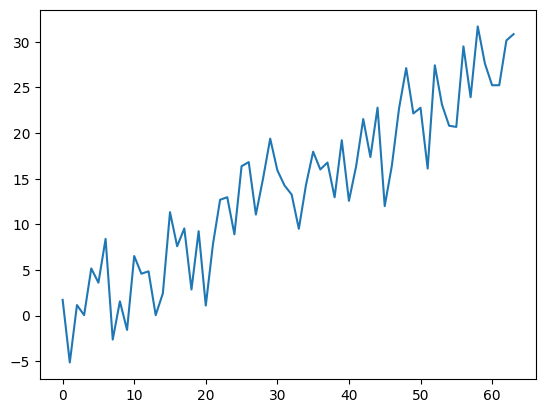

In [ ]:
plt.plot(data[1])

In [ ]:
for i in range(3, -1, -1):
    if luing_box_test(sma(data[1])[i], data[1]):
        print(f'Есть ли наличие автокорреляции до {i+1}-ого порядка в SMA: {luing_box_test(sma(data[1])[i], data[1])}')
        break

for i in range(3, -1, -1):
    if luing_box_test(wma(data[1])[i], data[1]):
        print(f'Есть ли наличие автокорреляции до {i+1}-ого порядка в WMA: {luing_box_test(wma(data[1])[i], data[1])}')
        break

for i in range(8, -1, -1):
    if luing_box_test(ema(data[1])[i], data[1]):
        print(f'Есть ли наличие автокорреляции до {i+1}-ого порядка в EMA: {luing_box_test(ema(data[1])[i], data[1])}')
        break

a = False
for i in range(8, -1, -1):
    if a:
        break
    for j in range(8, -1, -1):
        a = luing_box_test(dema(data[1])[i][j], data[1])
        if a:
            print(f'Есть ли наличие автокорреляции до {i+1, j+1}-ого порядка в DEMA: {luing_box_test(dema(data[1])[i][j], data[1])}')
            break

Есть ли наличие автокорреляции до 4-ого порядка в SMA: True
Есть ли наличие автокорреляции до 4-ого порядка в WMA: True
Есть ли наличие автокорреляции до 9-ого порядка в EMA: True
Есть ли наличие автокорреляции до (9, 9)-ого порядка в DEMA: True


In [ ]:
print(f'Есть ли положительная автокорреляция до {4}-ого порядка в SMA: {durbin_watson_test(sma(data[1])[3], data[1])}')

print(f'Есть ли положительная автокорреляция до {4}-ого порядка в WMA: {durbin_watson_test(wma(data[1])[3], data[1])}')

print(f'Есть ли положительная автокорреляция до {9}-ого порядка в EMA: {durbin_watson_test(ema(data[1])[8], data[1])}')

print(f'Есть ли положительная автокорреляция {9, 9}-ого порядка в DEMA: {durbin_watson_test(dema(data[1])[8][8], data[1])}')

Есть ли положительная автокорреляция до 4-ого порядка в SMA: False
Есть ли положительная автокорреляция до 4-ого порядка в WMA: False
Есть ли положительная автокорреляция до 9-ого порядка в EMA: False
Есть ли положительная автокорреляция (9, 9)-ого порядка в DEMA: False


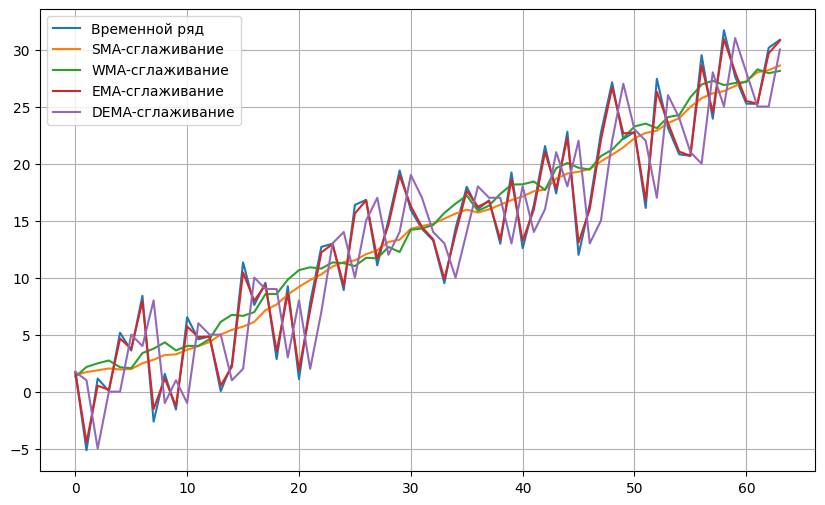

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data[1])
plt.plot(sma(data[1])[3])
plt.plot(wma(data[1])[3])
plt.plot(ema(data[1])[8])
plt.plot(dema(data[1])[8][8])
plt.legend(['Временной ряд', 'SMA-сглаживание', 'WMA-сглаживание', 'EMA-сглаживание', 'DEMA-сглаживание'])
plt.grid()
plt.show()